### A First, Naive Learned Index on Log normal dataset
This is an implementation of learning indexes using neural networks as described in the recent [paper](https://arxiv.org/pdf/1712.01208.pdf) from google.

##### some variable initialisations

In [1]:
mu, sigma = 3., 1. # mean and standard deviation


##### Importing libraries and preparing training data to be indexed

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np
from datetime import datetime
import re
from collections import Counter
data = []
def apache_log_reader(logfile):
    myregex = r'\d{2}/.../\d{4}\:\d{2}\:\d{2}\:\d{2}'
    i = 0
    with open(logfile) as f:
        for log in f:
            ts = re.findall(myregex,log)[0]
            dt = datetime.strptime(ts,"%d/%b/%Y:%H:%M:%S")
            #data.append([i,dt.timestamp(),dt.year,dt.month,dt.day,dt.hour,dt.minute,dt.second])
            data.append(dt.timestamp())
            i = i+1
apache_log_reader("access.log")
np_data = np.asarray(data)
num_datapoints = np_data.shape[0]

##### Using pytorch to train a neural network to learn the indexes of the dataset (s)

In [9]:
%%time
import torch
from index_learner import *
D_in, H, D_out =  1, 100, 1
model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out),
    )
x = torch.FloatTensor(np_data.reshape(num_datapoints,1)[:,:])
plot_step,plot_lossess,model = learn_index(num_datapoints,x,model)

0 2.1561513215000576e+16
1000 37591428.0
2000 37591428.0
3000 37596348.0
4000 37596348.0


##### Time taken by model to predict index positions for all points in the dataset (s)

In [10]:
%%time
predicted_index,error_predicted_index = predict_indexes(num_datapoints,model,x)

Total datapoint: 21495
CPU times: user 1.48 s, sys: 96.6 ms, total: 1.58 s
Wall time: 1.61 s


##### Various plots to visually understand the dataset, model trainig and index predictions.
Plot 2 shows that the error in predicted_index is very low usually around zero for most of the dataset. This is an encouraging result for a naive approach in using neural network for learning indexes.

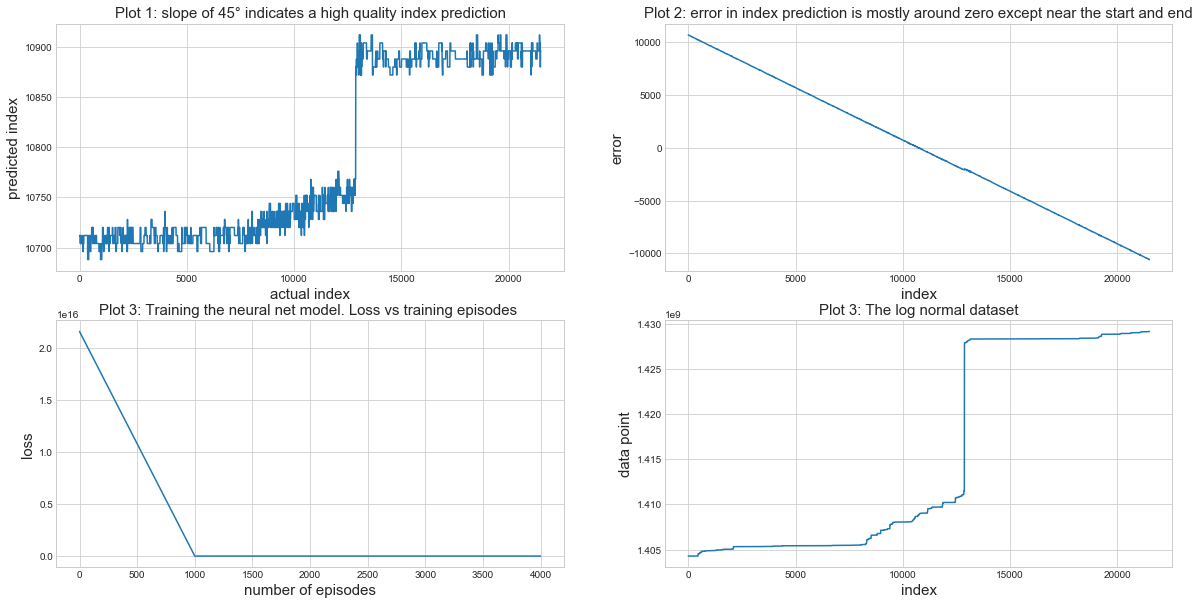

In [11]:
plot_results(num_datapoints,predicted_index,error_predicted_index
                ,plot_step,plot_lossess,np_data)